<a href="https://colab.research.google.com/github/nigamsatvik/Major1/blob/master/Covid19_Detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras import models
from keras import optimizers
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
import os


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


***SIZE OF TRAINING DATASET***


In [4]:
xclass=["NORMAL","COVID-19","Viral Pneumonia"]
base_path="gdrive/My Drive/COVID-19 Radiography Database/"
for xclass in os.listdir(base_path + "train"):
    print(str(len(os.listdir(base_path + "train/" + xclass))) + " " + xclass + " images")

1065 NORMAL images
1072 Viral Pneumonia images
687 COVID-19 images


***SIZE OF TESTING DATASET***

In [5]:
for xclass in os.listdir(base_path + "test"):
    print(str(len(os.listdir(base_path + "test/" + xclass))) + " " + xclass + " images")

276 NORMAL images
276 Viral Pneumonia images
180 COVID-19 images


***SAMPLE IMAGES***

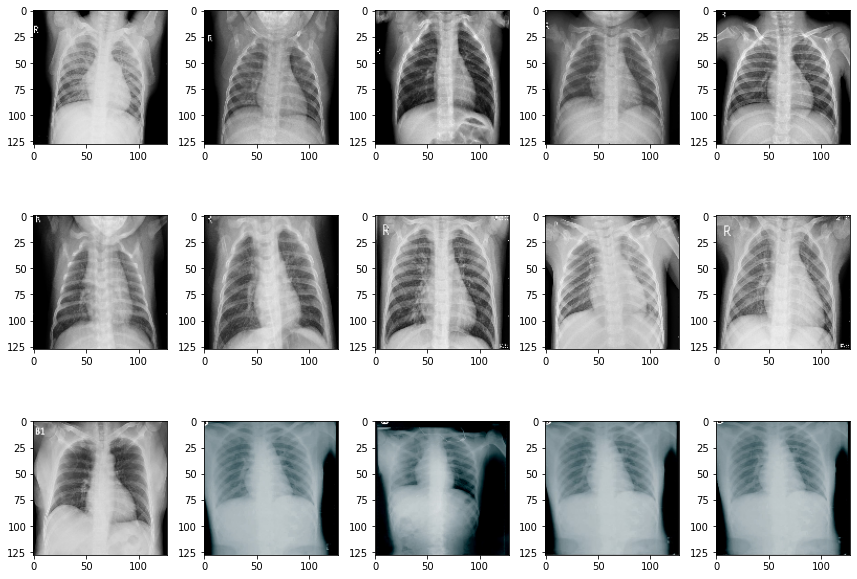

In [13]:
pic_size=128
cpt = 0
plt.figure(figsize=(12,20))
for xclass in os.listdir(base_path + "train/"):
    for i in range(1,6):
      cpt = cpt + 1
      plt.subplot(7,5,cpt)
      img = load_img(base_path + "train/" + xclass + "/" +os.listdir(base_path + "train/" + xclass)[i], target_size=(pic_size, pic_size))
      plt.imshow(img, cmap="gray")
plt.tight_layout()
plt.show()

FEEDING DATA TO MODEL USING ImageDataGenerator FROM KERAS





In [14]:
batch_size = 128

train_data = ImageDataGenerator()
test_data = ImageDataGenerator()

train_generator = train_data.flow_from_directory(base_path + "train",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

test_generator = test_data.flow_from_directory(base_path + "test",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 2824 images belonging to 3 classes.
Found 732 images belonging to 3 classes.


In [15]:
classes=3
model=Sequential()
#input/convolution layer
model.add(Conv2D(64,(3,3),padding='same',strides=(1,1),activation='relu',input_shape=(128,128,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
#convolution layer
model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#convolution layer
model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# flatten
model.add(Flatten())
#hidden layer 1
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
#hidden layer 2
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
#output layer
model.add(Dense(3,activation='softmax'))
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
epochs = 50
model.summary()
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
history=model.fit_generator(generator=train_generator,steps_per_epoch=train_generator.n//train_generator.batch_size,epochs=50,validation_data=test_generator,validation_steps=test_generator.n//test_generator.batch_size,callbacks=callbacks_list)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      640       
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 128)       0

In [20]:
accur=(np.mean(history.history['val_accuracy']))*100
ac="{0:.2f}".format(accur)
print("The accuracy of trained model is",ac)

The accuracy of trained model is 75.88
